In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import  Conv2D,MaxPool2D,Flatten,Dense, Dropout
from keras.optimizers import Adam
from keras.layers import Input, Dense
from keras.models import load_model
from keras.preprocessing import image

In [170]:
TrainInputPath = []
TrainLabel = []
TestInputPath = []
TestLabel = []
ValInputPath = []
ValLabel = []
sourceFileDir = os.path.dirname(os.path.abspath("__file__"))
Rays = {}

for DType in os.listdir(os.path.join(sourceFileDir,"XRays")):
        i = 0
        for Class in os.listdir(os.path.join(sourceFileDir,"XRays",DType)):
            for path in os.listdir(os.path.join(sourceFileDir, "XRays", DType, Class)):
                if DType=="train":
                    TrainLabel.append(i)
                    TrainInputPath.append(os.path.join("XRays", DType, Class, path))
                elif DType=="val":
                    ValLabel.append(i)
                    ValInputPath.append(os.path.join("XRays", DType, Class, path))
                else:
                    TestLabel.append(i)
                    TestInputPath.append(os.path.join("XRays", DType, Class, path))
            Rays.update({i:Class})
            i+=1
            
print(Rays)

{0: 'PNEUMONIA', 1: 'NORMAL'}


In [171]:
tdf = pd.DataFrame()
tdf['images'] = TrainInputPath
tdf['label'] = TrainLabel
tdf = tdf.sample(frac=1).reset_index(drop=True)
tdf.head(10)

,images,label
0,XRays/train/NORMAL/IM-0697-0001.jpeg,1
1,XRays/train/NORMAL/NORMAL2-IM-0875-0001.jpeg,1
2,XRays/train/PNEUMONIA/person898_bacteria_2823....,0
3,XRays/train/NORMAL/NORMAL2-IM-1401-0001.jpeg,1
4,XRays/train/NORMAL/NORMAL2-IM-0453-0001.jpeg,1
5,XRays/train/PNEUMONIA/person30_bacteria_153.jpeg,0
6,XRays/train/PNEUMONIA/person541_bacteria_2275....,0
7,XRays/train/PNEUMONIA/person1129_bacteria_3070...,0
8,XRays/train/PNEUMONIA/person1030_virus_1722.jpeg,0
9,XRays/train/PNEUMONIA/person480_bacteria_2039....,0


In [172]:
vdf = pd.DataFrame()
vdf['images'] = ValInputPath
vdf['label'] = ValLabel
vdf = vdf.sample(frac=1).reset_index(drop=True)
vdf.head(10)

,images,label
0,XRays/val/PNEUMONIA/person100_bacteria_481.jpeg,0
1,XRays/val/NORMAL/IM-0101-0001.jpeg,1
2,XRays/val/NORMAL/NORMAL2-IM-0288-0001.jpeg,1
3,XRays/val/PNEUMONIA/person1615_virus_2801.jpeg,0
4,XRays/val/PNEUMONIA/person1619_virus_2806.jpeg,0
5,XRays/val/PNEUMONIA/person62_virus_119.jpeg,0
6,XRays/val/PNEUMONIA/person103_bacteria_489.jpeg,0
7,XRays/val/NORMAL/IM-0033-0001-0001.jpeg,1
8,XRays/val/PNEUMONIA/person1647_virus_2848.jpeg,0
9,XRays/val/PNEUMONIA/person153_bacteria_725.jpeg,0


In [173]:
testdf = pd.DataFrame()
testdf['images'] = TestInputPath
testdf['label'] = TestLabel
testdf = testdf.sample(frac=1).reset_index(drop=True)
testdf.head(10)

,images,label
0,XRays/test/PNEUMONIA/person1947_bacteria_4876....,0
1,XRays/test/NORMAL/NORMAL2-IM-1431-0001.jpeg,1
2,XRays/test/PNEUMONIA/person1946_bacteria_4875....,0
3,XRays/test/NORMAL/NORMAL2-IM-1427-0001.jpeg,1
4,XRays/test/PNEUMONIA/person1952_bacteria_4883....,0
5,XRays/test/NORMAL/NORMAL2-IM-1430-0001.jpeg,1
6,XRays/test/NORMAL/NORMAL2-IM-1438-0001.jpeg,1
7,XRays/test/NORMAL/NORMAL2-IM-1442-0001.jpeg,1
8,XRays/test/NORMAL/NORMAL2-IM-1436-0001.jpeg,1
9,XRays/test/PNEUMONIA/person1949_bacteria_4880....,0


<Axes: xlabel='label', ylabel='count'>

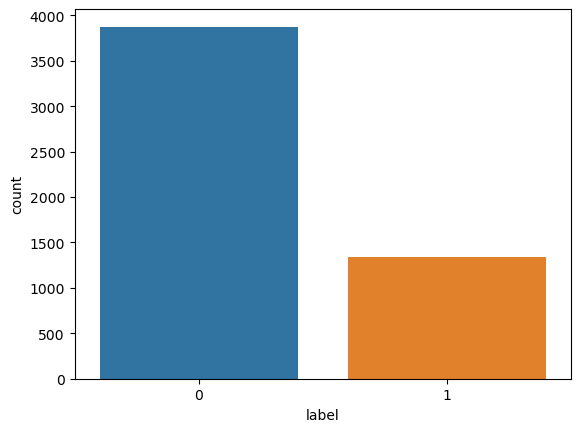

In [174]:
import seaborn as sns
sns.countplot(data=tdf,x='label')

In [175]:
tdf['label'] = tdf['label'].astype('str')
vdf['label'] = vdf['label'].astype('str')
testdf['label'] = testdf['label'].astype('str')

In [176]:
TrainGenerator = ImageDataGenerator(dtype = 'float32',
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip=True,
    fill_mode = 'nearest'
)
ValGenerator = ImageDataGenerator(dtype = 'float32',
        rescale = 1./255)

TrainIterator = TrainGenerator.flow_from_dataframe(
    tdf, 
    x_col='images', 
    y_col='label', 
    target_size=(32,32), 
    batch_size=8, 
    class_mode='binary'
)
ValIterator = ValGenerator.flow_from_dataframe(
    vdf, 
    x_col='images', 
    y_col='label', 
    target_size=(32,32), 
    batch_size=8, 
    class_mode='binary'
)

Found 5216 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [177]:
model = Sequential()
model.add(Conv2D(128,(5,5),input_shape = (32,32,3),activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) # output
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 9216)              0         
                                                                 
 dense_28 (Dense)            (None, 512)             

In [178]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [179]:
history = model.fit(
    TrainIterator,
    validation_data=ValIterator,
    epochs=20,
)

Epoch 1/20
652/652 [==============================] - 100s 146ms/step - loss: 0.4693 - binary_accuracy: 0.7864 - val_loss: 0.4036 - val_binary_accuracy: 0.8301
Epoch 2/20
652/652 [==============================] - 86s 132ms/step - loss: 0.3187 - binary_accuracy: 0.8602 - val_loss: 0.3409 - val_binary_accuracy: 0.8574
Epoch 3/20
652/652 [==============================] - 86s 131ms/step - loss: 0.2838 - binary_accuracy: 0.8786 - val_loss: 0.4107 - val_binary_accuracy: 0.7997
Epoch 4/20
652/652 [==============================] - 89s 137ms/step - loss: 0.2619 - binary_accuracy: 0.8877 - val_loss: 0.3508 - val_binary_accuracy: 0.8494
Epoch 5/20
652/652 [==============================] - 93s 142ms/step - loss: 0.2508 - binary_accuracy: 0.8923 - val_loss: 0.3114 - val_binary_accuracy: 0.8798
Epoch 6/20
652/652 [==============================] - 90s 135ms/step - loss: 0.2391 - binary_accuracy: 0.8982 - val_loss: 0.3582 - val_binary_accuracy: 0.8574
Epoch 7/20
652/652 [=========================

In [180]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(len(acc))
print(acc)
print(val_acc)

[0.7864263653755188, 0.860237717628479, 0.8786426186561584, 0.8876533508300781, 0.8922545909881592, 0.8981978297233582, 0.9056748747825623, 0.9093174934387207, 0.9190950989723206, 0.918136477470398, 0.9217791557312012, 0.9198619723320007, 0.92695552110672, 0.9292561411857605, 0.925613522529602, 0.932898759841919, 0.931556761264801, 0.9378834366798401, 0.9359662532806396, 0.9363496899604797]
[0.8301281929016113, 0.8573718070983887, 0.7996794581413269, 0.8493589758872986, 0.879807710647583, 0.8573718070983887, 0.8766025900840759, 0.8814102411270142, 0.8621794581413269, 0.8846153616905212, 0.8814102411270142, 0.8974359035491943, 0.8621794581413269, 0.8926281929016113, 0.8974359035491943, 0.8974359035491943, 0.8092948794364929, 0.9038461446762085, 0.9038461446762085, 0.9054487347602844]


In [190]:
model.save("m1.h5")
model.save("m1.keras")

/home/abdulrahman/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [185]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

TestGenerator = ImageDataGenerator(dtype = 'float32')

TestIterator = TestGenerator.flow_from_dataframe(
    testdf, 
    x_col='images', 
    y_col='label', 
    target_size=(32,32), 
    batch_size=8, 
    class_mode='binary'
)

Y_pred = model.predict_generator(TestIterator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(TestIterator.classes, y_pred))

print('Classification Report')
target_names = ['PNEUMONIA', 'NORMAL']
print(classification_report(TestIterator.classes, y_pred, target_names=target_names))

Found 16 validated image filenames belonging to 2 classes.


/tmp/ipykernel_39370/3456863816.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(TestIterator)


Confusion Matrix
[[8 0]
 [8 0]]
Classification Report
              precision    recall  f1-score   support

   PNEUMONIA       0.50      1.00      0.67         8
      NORMAL       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/home/abdulrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdulrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdulrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [186]:
TestIterator.classes

[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]

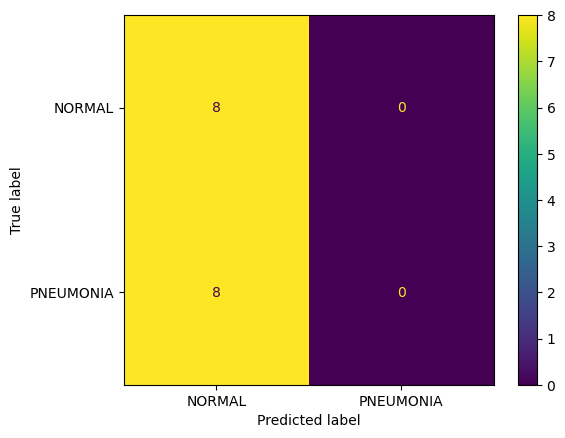

In [189]:
cm = confusion_matrix(TestIterator.classes, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot()